In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
### Data loading preparation

def prepareDataClassification(data, train=True):
    # data cleaning
    data.drop(columns=['text', 'hashtags', 'user_mentions', 'hashtags', 'urls', 'id'], inplace=True)
    if train:
        data['bins'] = pd.cut(data['retweet_count'], bins=[-1,1,2,3,4,10,100,1000,10000,50000,100000,200000,500000,1000000], labels=[0,1,2,3,4,10,100,1000,10000,50000,100000,200000,500000])
        X = data.drop(['classif','retweet_count'], axis=1)
        y = data['classif']
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['bins'], test_size=0.3)
        X_train = X_train.drop(columns=['bins'])
        X_test = X_test.drop(columns=['bins'])
        return X_train, X_test, y_train, y_test
    else:
        return data

df = pd.read_csv('../../data/train_clean_final.csv')
df_eval = pd.read_csv('../../data/eval_clean_final.csv')

#Adding classification column
df['classif'] = pd.cut(df['retweet_count'], bins=[-1,4,197,1000000], labels=[0,1,2])

X_train, X_test, y_train, y_test = prepareDataClassification(df, True)
X_test_eval = prepareDataClassification(df_eval, False)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
X_eval_norm = scaler.transform(X_test_eval)

### Random Forest Classifier

In [30]:
params = {'random_state':9}

SyntaxError: invalid syntax (<ipython-input-30-c76b4a0a0a55>, line 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.7s finished


Accuracy: 0.8695715301350797


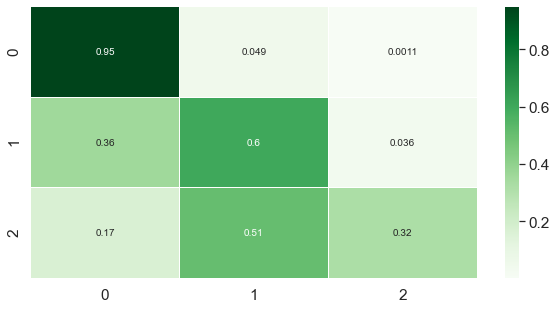

In [29]:
rfc = RandomForestClassifier(**params, verbose=2)
rfc.fit(X_train_norm, y_train)

#Confusion matrix
y_pred=rfc.predict(X_test_norm)
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.savefig('results/Confusion_matri_RF_default')

In [33]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))

Accuracy: 0.8695715301350797
F1-score: [0.93576824 0.60941484 0.43161454]


<Figure size 432x288 with 0 Axes>

### Gradient Boosting Classifier

In [38]:
gbc = GradientBoostingClassifier(random_state=0, verbose=2)
gbc.fit(X_train_norm, y_train) 

      Iter       Train Loss   Remaining Time 
         1      248976.9467            6.14m
         2      230382.3028            5.87m
         3      216689.8908            5.68m
         4      206055.3500            5.59m
         5      197590.0718            5.49m
         6      190657.3057            5.46m
         7      184989.0712            5.37m
         8      180274.9523            5.30m
         9      176309.2690            5.22m
        10      172998.8866            5.16m
        11      170155.2697            5.09m
        12      167921.9975            5.03m
        13      165741.2019            4.99m
        14      164048.8818            4.92m
        15      162363.8269            4.86m
        16      161134.3491            4.80m
        17      159949.3306            4.74m
        18      158844.6347            4.68m
        19      158047.5123            4.63m
        20      157350.7088            4.58m
        21      156803.9101            4.54m
        2

GradientBoostingClassifier(random_state=0, verbose=2)

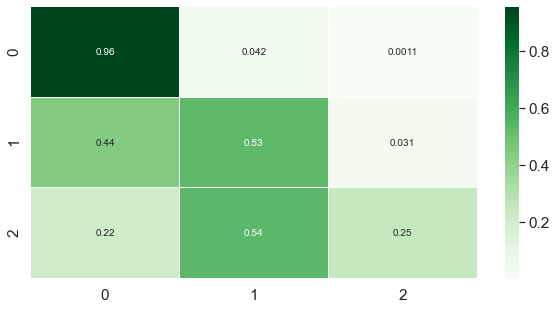

In [39]:
#Confusion matrix
y_pred=gbc.predict(X_test_norm)
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.savefig('results/Confusion_matri_GBC')

In [40]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))

Accuracy: 0.8603893177926643
F1-score: [0.93112683 0.56304867 0.35401757]


### K-nearest neighbors classifier

In [32]:
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance')
neigh.fit(X_train_norm, y_train)  #too long

KNeighborsClassifier(n_neighbors=2, weights='distance')

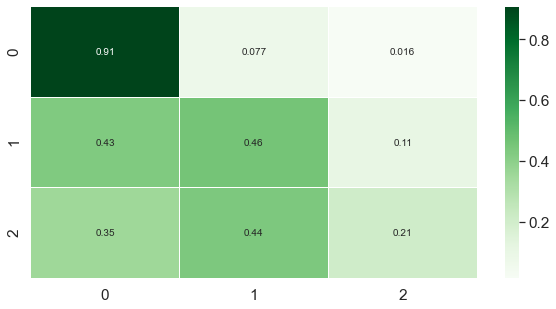

In [33]:
#Confusion matrix
y_pred = neigh.predict(X_test_norm)
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.savefig('results/Confusion_matri_KNN')

In [34]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))

Accuracy: 0.8088333333333333
F1-score: [0.90286282 0.47038627 0.21318493]


### Logistic regression (classifier)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\vic_t\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s finished


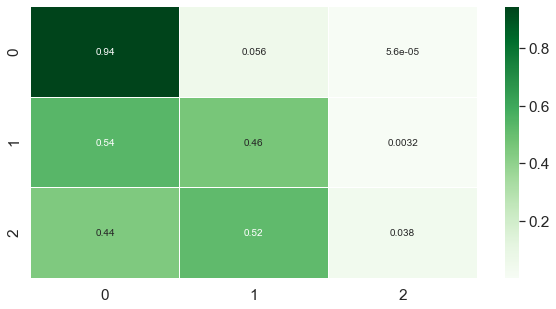

In [37]:
lgc = LogisticRegression(random_state=9, verbose=1)
lgc.fit(X_train_norm, y_train)

#Confusion matrix
y_pred = lgc.predict(X_test_norm)
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.savefig('results/Confusion_matri_LGC')